In [ ]:
# ====================================================================
#        GRÁFICO DE INFLUENCIADORES - DBO (5, 20) | 2012 a 2020
# ====================================================================

import pandas as pd
import plotly.express as px

# Caminho relativo do arquivo Excel (coloque o arquivo na pasta 'dados' do repositório)
arquivo = 'dados/TIET04200.xlsx'

# Leitura da aba "Analise"
df = pd.read_excel(arquivo, sheet_name="Analise")

# Converter coluna Data para datetime e filtrar entre 2012 e 2020
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df[(df['Data'] >= '2012-01-01') & (df['Data'] <= '2019-12-31')]

# Pivotar para ter Data no índice e parâmetros nas colunas
df_pivot = df.pivot(index='Data', columns='Parametro', values='Valor')

# Calcular correlação com o parâmetro alvo "DBO (5, 20)"
corr = df_pivot.corr()['DBO (5, 20)'].drop('DBO (5, 20)').dropna()

# Preparar DataFrame para o gráfico
df_corr = corr.reset_index()
df_corr.columns = ['Parametro', 'Correlacao']

# Plot interativo com Plotly Express
fig = px.bar(
    df_corr,
    x='Parametro',
    y='Correlacao',
    title='Correlação dos Parâmetros com DBO (5, 20) — Período: 2012 a 2019',
    labels={'Correlacao': 'Coeficiente de Correlação', 'Parametro': 'Parâmetro'},
    color='Correlacao',
    color_continuous_scale='Viridis',
    text=df_corr['Correlacao'].apply(lambda x: f"{x:.2f}")
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
    yaxis=dict(range=[min(df_corr['Correlacao']) - 0.1, 1])
)

fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Caminho relativo do arquivo Excel (coloque o arquivo na pasta 'dados' do repositório)
arquivo = 'dados/TIET04200.xlsx'
df = pd.read_excel(arquivo, sheet_name="Analise")

# Converter coluna Data para datetime e filtrar entre 2012 e 2019
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df[(df['Data'] >= '2012-01-01') & (df['Data'] <= '2019-12-31')]

# Pivotar para ter Data no índice e parâmetros nas colunas
df_pivot = df.pivot(index='Data', columns='Parametro', values='Valor')

# Calcular correlação com o parâmetro alvo "DBO (5, 20)"
corr = df_pivot.corr()['DBO (5, 20)'].drop('DBO (5, 20)').dropna()

# Pegar só os 6 maiores em valor absoluto
corr_top6 = corr.reindex(corr.abs().sort_values(ascending=False).index)[:6]

# Preparar DataFrame para o gráfico
df_corr = corr_top6.reset_index()
df_corr.columns = ['Parametro', 'Correlacao']

# Ajustar range_color para seu intervalo real
min_corr = df_corr['Correlacao'].min()
max_corr = df_corr['Correlacao'].max()

# Definir escala só com azul, do clarinho (#cce5ff) até azul escuro (#003366)
blue_scale = ['#cce5ff', '#003366']

fig = px.bar(
    df_corr,
    x='Parametro',
    y='Correlacao',
    title='Top 6 Parâmetros com Maior Correlação com DBO (5, 20) — 2012 a 2019',
    labels={'Correlacao': 'Coeficiente de Correlação', 'Parametro': 'Parâmetro'},
    color='Correlacao',
    color_continuous_scale=blue_scale,
    range_color=[min_corr, max_corr],
    text=df_corr['Correlacao'].apply(lambda x: f"{x:.2f}")
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
    yaxis=dict(range=[min_corr - 0.1, 1])
)

fig.show()



In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Caminho relativo do arquivo Excel (coloque o arquivo na pasta 'dados' do repositório)
arquivo = 'dados/TIET04200.xlsx'
df = pd.read_excel(arquivo, sheet_name="Analise")

# Converter coluna Data para datetime e filtrar entre 2012 e 2020
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df_periodo = df[(df['Data'] >= '2012-01-01') & (df['Data'] <= '2019-12-31')]

# Lista dos parâmetros que quer analisar
parametros = ['DBO (5, 20)', 'Fósforo Total', 'Condutividade', 'Sólido Dissolvido Total', 'Nitrogênio Amoniacal', 'Sólido Total']

# Dicionário para armazenar as estatísticas (sem Contagem, Assimetria, Curtose e Valores Nulos)
estatisticas_geral = {
    'Parâmetro': [],
    'Média': [],
    'Mediana': [],
    'Desvio Padrão': [],
    'Mínimo': [],
    'Máximo': [],
    '1º Quartil (25%)': [],
    '3º Quartil (75%)': []
}

for p in parametros:
    dados = df_periodo[df_periodo['Parametro'] == p]['Valor']
    estatisticas_geral['Parâmetro'].append(p)
    estatisticas_geral['Média'].append(dados.mean())
    estatisticas_geral['Mediana'].append(dados.median())
    estatisticas_geral['Desvio Padrão'].append(dados.std())
    estatisticas_geral['Mínimo'].append(dados.min())
    estatisticas_geral['Máximo'].append(dados.max())
    estatisticas_geral['1º Quartil (25%)'].append(dados.quantile(0.25))
    estatisticas_geral['3º Quartil (75%)'].append(dados.quantile(0.75))

# Transformar em DataFrame
df_stats = pd.DataFrame(estatisticas_geral)

# Formatar números decimais para duas casas, exceto parâmetro
for col in df_stats.columns:
    if col != 'Parâmetro':
        df_stats[col] = df_stats[col].apply(lambda x: f"{x:.2f}" if pd.notnull(x) else "NaN")

# Criar tabela Plotly interativa
fig = go.Figure(data=[go.Table(
    columnwidth=[150] + [110]*7,
    header=dict(
        values=[f"<b>{c}</b>" for c in df_stats.columns],
        fill_color='#4B8BBE',
        font=dict(color='white', size=14),
        align='center',
        height=40
    ),
    cells=dict(
        values=[df_stats[col] for col in df_stats.columns],
        fill_color=[['#D6EAF8', 'white'] * (len(df_stats) // 2 + 1)],
        align='center',
        font=dict(color='#222222', size=12),
        height=30
    )
)])

fig.update_layout(
    title_text='Estatísticas dos Parâmetros (2012 - 2020)',
    title_font_size=18,
    title_x=0.5,
    width=1200,
    height=500,
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.show()



Fold 1
MSE: 88.16, RMSE: 9.39, MAE: 8.00, R2: 0.858, MAPE: 14.55%

Fold 2


c:\Users\gustavo.nunes\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\TCC\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning:

lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MSE: 244.92, RMSE: 15.65, MAE: 12.77, R2: 0.649, MAPE: 40.78%

Fold 3


c:\Users\gustavo.nunes\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\TCC\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning:

lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MSE: 40.44, RMSE: 6.36, MAE: 5.51, R2: 0.911, MAPE: 10.97%

Fold 4


c:\Users\gustavo.nunes\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\TCC\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning:

lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MSE: 34.09, RMSE: 5.84, MAE: 4.60, R2: 0.829, MAPE: 14.17%

Fold 5


c:\Users\gustavo.nunes\OneDrive - RADIX ENGENHARIA E DESENVOLVIMENTO DE SOFTWARE S A\Área de Trabalho\TCC\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning:

lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MSE: 54.69, RMSE: 7.40, MAE: 5.80, R2: 0.648, MAPE: 18.57%

=== Métricas médias da Validação Cruzada ===
MSE médio: 92.46
RMSE médio: 8.93
MAE médio: 7.34
R2 médio: 0.779
MAPE médio: 19.81%


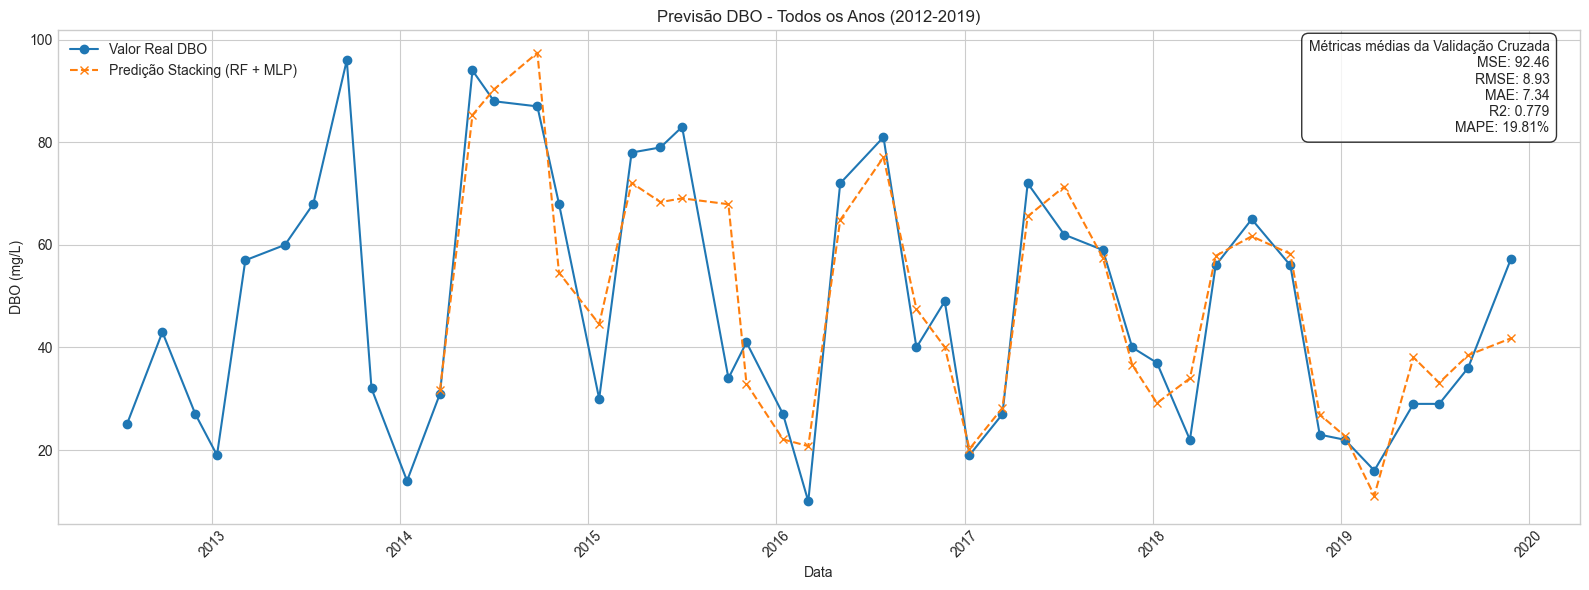

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # Pode trocar para RobustScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Função para calcular MAPE, com proteção contra divisão por zero
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# ==================== Carregamento e pré-processamento ====================
# Caminho relativo (coloque o arquivo Excel na pasta 'dados' do repositório)
arquivo = 'dados/TIET04200.xlsx'
df = pd.read_excel(arquivo, sheet_name="Analise")
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)

# Filtrar dados 2012 a 2019 (bimestrais)
df = df[(df['Data'] >= '2012-01-01') & (df['Data'] <= '2019-12-31')]

# Pivot para colocar os parâmetros como colunas
df_pivot = df.pivot(index='Data', columns='Parametro', values='Valor')

# Excluir colunas com baixa cobertura (ajuste se necessário)
cols_to_drop = ['Nitrogênio Total', 'Dureza', 'Sólido Suspenso Total']
df_pivot = df_pivot.drop(columns=cols_to_drop, errors='ignore')

# Seleção das features e target (adicionando as novas)
features = ['Fósforo Total', 'Condutividade', 'Sólido Dissolvido Total', 'Nitrogênio Amoniacal', 'Sólido Total']
target = 'DBO (5, 20)'

df_model = df_pivot[[target] + features].copy()

# Interpolação e preenchimento dados faltantes nas features
df_model[features] = df_model[features].interpolate(method='time').bfill().ffill()

# Para o target: interpolar e preencher mediana
df_model[target] = df_model[target].interpolate(method='time').fillna(df_model[target].median())

# Tratar outliers no target com winsorização via z-score
z_scores = zscore(df_model[target])
outliers = np.abs(z_scores) > 3
df_model.loc[outliers, target] = df_model[target].median()

# Criar variáveis sazonais (opcional)
def get_estacao(data):
    ano = data.year
    verao_inicio = pd.Timestamp(year=ano, month=12, day=21)
    outono_inicio = pd.Timestamp(year=ano, month=3, day=21)
    inverno_inicio = pd.Timestamp(year=ano, month=6, day=21)
    primavera_inicio = pd.Timestamp(year=ano, month=9, day=23)
    verao_fim = pd.Timestamp(year=ano, month=3, day=20)

    if (data >= verao_inicio) or (data <= verao_fim):
        return 'Verao'
    elif (data > outono_inicio) and (data <= inverno_inicio):
        return 'Outono'
    elif (data > inverno_inicio) and (data <= primavera_inicio):
        return 'Inverno'
    else:
        return 'Primavera'

df_model['estacao'] = df_model.index.to_series().apply(get_estacao)
df_model = pd.get_dummies(df_model, columns=['estacao'])

# Features temporais
df_model['mes'] = df_model.index.month
df_model['dia_do_ano'] = df_model.index.dayofyear

# Lags e rolling para target DBO
df_model['DBO_lag1'] = df_model[target].shift(1)
df_model['DBO_lag2'] = df_model[target].shift(2)
df_model['DBO_lag3'] = df_model[target].shift(3)
df_model['DBO_roll_mean3'] = df_model[target].rolling(window=3).mean().shift(1)
df_model['DBO_roll_std3'] = df_model[target].rolling(window=3).std().shift(1)

# Drop linhas com NA resultantes das operações acima
df_model = df_model.dropna()

# ==================== Setup do modelo e validação cruzada temporal ====================
X = df_model.drop(columns=[target])
y = df_model[target]

# Escolha do scaler
scaler = StandardScaler()  # ou RobustScaler()

# TimeSeriesSplit com 5 folds (bimestrais)
tscv = TimeSeriesSplit(n_splits=5)

metrics_list = []

# Para armazenar as predições ao longo de toda a série temporal
y_pred_all = pd.Series(index=y.index, dtype='float64')

plt.style.use('seaborn-v0_8-whitegrid')

fold_num = 1
for train_idx, test_idx in tscv.split(X):
    print(f"\nFold {fold_num}")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Escalonar features (importante para MLP)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Random Forest
    rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=24,
        max_features='sqrt',
        min_samples_leaf=3,
        min_samples_split=6,
        random_state=42
    )
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)

    # MLPRegressor
    mlp = MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='tanh',
        solver='lbfgs',
        alpha=0.00395,
        learning_rate='constant',
        max_iter=5000,
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    mlp_pred = mlp.predict(X_test_scaled)

    # Stacking: regressão linear combinando predições RF + MLP
    stack_model = LinearRegression()
    stack_model.fit(np.column_stack([rf_pred, mlp_pred]), y_test)
    y_pred = stack_model.predict(np.column_stack([rf_pred, mlp_pred]))

    # Armazenar predições no local correto (usando o índice do y_test)
    y_pred_all.iloc[test_idx] = y_pred

    # Métricas fold
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.3f}, MAPE: {mape:.2f}%")

    metrics_list.append({'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape})

    fold_num += 1

# ==================== Métricas médias ====================
df_metrics = pd.DataFrame(metrics_list)
mse_mean = df_metrics['MSE'].mean()
rmse_mean = df_metrics['RMSE'].mean()
mae_mean = df_metrics['MAE'].mean()
r2_mean = df_metrics['R2'].mean()
mape_mean = df_metrics['MAPE'].mean()

print("\n=== Métricas médias da Validação Cruzada ===")
print(f"MSE médio: {mse_mean:.2f}")
print(f"RMSE médio: {rmse_mean:.2f}")
print(f"MAE médio: {mae_mean:.2f}")
print(f"R2 médio: {r2_mean:.3f}")
print(f"MAPE médio: {mape_mean:.2f}%")

# ==================== Plot geral com todos os anos ====================
plt.figure(figsize=(16,6))
plt.plot(y.index, y, label='Valor Real DBO', marker='o', linestyle='-', color='tab:blue')
plt.plot(y_pred_all.index, y_pred_all, label='Predição Stacking (RF + MLP)', marker='x', linestyle='--', color='tab:orange')

plt.title('Previsão DBO - Todos os Anos (2012-2019)')
plt.xlabel('Data')
plt.ylabel('DBO (mg/L)')
plt.grid(True)
plt.xticks(rotation=45)

# Box com métricas médias no canto superior direito
textstr = '\n'.join((
    'Métricas médias da Validação Cruzada',
    f'MSE: {mse_mean:.2f}',
    f'RMSE: {rmse_mean:.2f}',
    f'MAE: {mae_mean:.2f}',
    f'R2: {r2_mean:.3f}',
    f'MAPE: {mape_mean:.2f}%'
))
props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8)
plt.gca().text(0.98, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right', bbox=props)

plt.legend()
plt.tight_layout()
plt.show()

